In [ ]:
!pip install -q mlxtend
!pip install -q imbalanced-learn
!pip install -q itables
!pip install -q xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/diabetes.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(768, 9)

In [ ]:
f = [1,2,3,4,5,6,7,8]
import itertools
for values in itertools.combinations(f,7):
    print(values)

(1, 2, 3, 4, 5, 6, 7)
(1, 2, 3, 4, 5, 6, 8)
(1, 2, 3, 4, 5, 7, 8)
(1, 2, 3, 4, 6, 7, 8)
(1, 2, 3, 5, 6, 7, 8)
(1, 2, 4, 5, 6, 7, 8)
(1, 3, 4, 5, 6, 7, 8)
(2, 3, 4, 5, 6, 7, 8)


In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df.iloc[:,-1]

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2, stratify= y, random_state=1)
rf = RandomForestClassifier(n_estimators= 100,random_state= 1, n_jobs=-1)

params = {
    'max_depth':[2,4,5,6],
    'max_features':[.2,.8,1.0],
}

columns = list(x.columns)

result = pd.DataFrame(index=range(255), columns=['attrs','score'])
c = 0
for n in range(1, x.shape[1]+1):
    for attrs in itertools.combinations(columns,n):
        xs = x_train[list(attrs)]
        # gsv = GridSearchCV(rf,param_grid = params,cv = 5, scoring = 'recall')
        rf.fit(xs, y_train)
        y_pred = rf.predict(x_test[list(attrs)])
        result.iloc[c,0] = attrs
        result.iloc[c,1] = recall_score(y_test, y_pred)
        c += 1

In [ ]:
result

attrs     score
0                                       (Pregnancies,)  0.222222
1                                           (Glucose,)  0.481481
2                                     (BloodPressure,)  0.166667
3                                     (SkinThickness,)  0.111111
4                                           (Insulin,)  0.166667
..                                                 ...       ...
250  (Pregnancies, Glucose, BloodPressure, Insulin,...  0.537037
251  (Pregnancies, Glucose, SkinThickness, Insulin,...       0.5
252  (Pregnancies, BloodPressure, SkinThickness, In...   0.37037
253  (Glucose, BloodPressure, SkinThickness, Insuli...  0.592593
254  (Pregnancies, Glucose, BloodPressure, SkinThic...       0.5

[255 rows x 2 columns]

In [ ]:
!pip install -q boruta   #Boruta Feature Selection
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(f'{data_path}/diabetes.csv')
x = df.drop(['Outcome'], axis=1)
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

# Initialize Boruta for feature selection
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Fit Boruta on the training data
boruta_selector.fit(x_train.values, y_train)

# Get the selected features
selected_features = x.columns[boruta_selector.support_].to_list()

print("Selected Features:", selected_features)

# Train the RandomForestClassifier on the selected features
rf.fit(x_train[selected_features], y_train)

# Predict on the test set using the selected features
y_pred = rf.predict(x_test[selected_features])

# Calculate and print the recall score
recall = recall_score(y_test, y_pred)
print(f"Recall Score with Selected Features: {recall}")


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	4
Selected Features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Recall Score with Selected Features: 0.5370370370370371


In [ ]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples= 150, n_features= 2,
                  centers= 3,
                  cluster_std= 2,
                  shuffle= True,
                  random_state= 42)

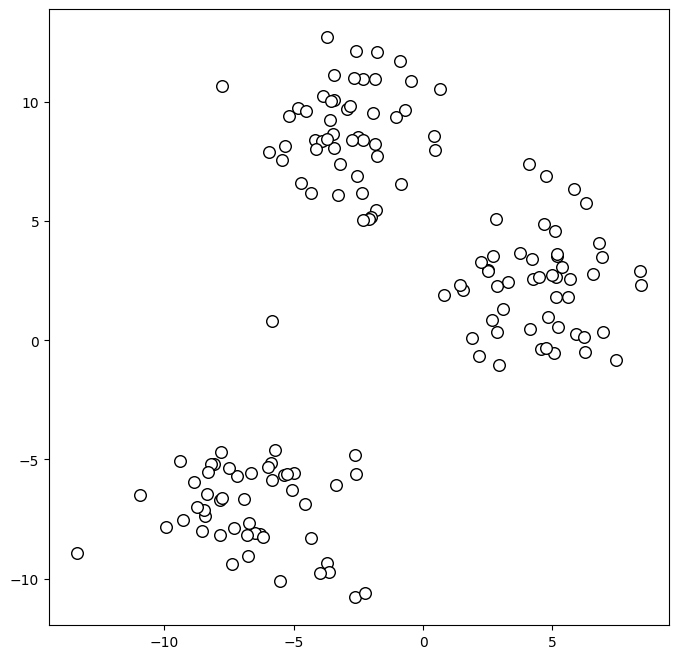

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = 'white', s = 70 , edgecolors= 'black')


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3)
km.fit(x)

KMeans(n_clusters=3)

In [ ]:
lables = km.labels_
lables

array([0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

In [ ]:
km.cluster_centers_

array([[-2.8937337 ,  8.79147131],
       [-6.62836458, -6.89878788],
       [ 4.52827469,  2.31311912]])

inertia: 0.0


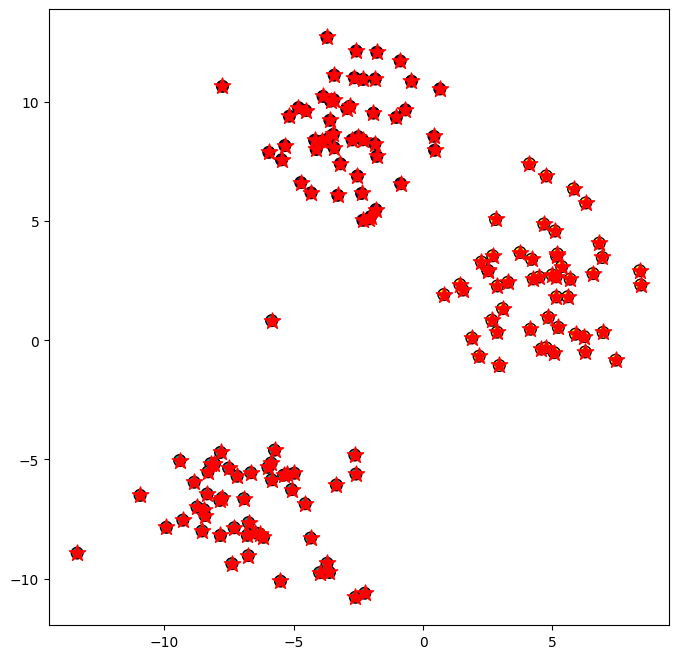

In [ ]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
km = KMeans(n_clusters= 150)
km.fit(x)
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = lables, s = 70 , edgecolors= 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'red', marker= '*',s = 150)
print('inertia:', km.inertia_)
plt.show()

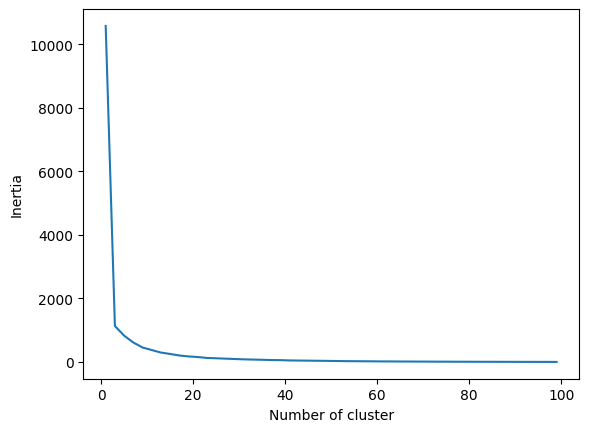

In [ ]:
intertia = []
for i in range(1, 100, 2):
    km = KMeans(n_clusters= i)
    km.fit(x)
    intertia.append(km.inertia_)
plt.plot(range(1, 100, 2), intertia)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

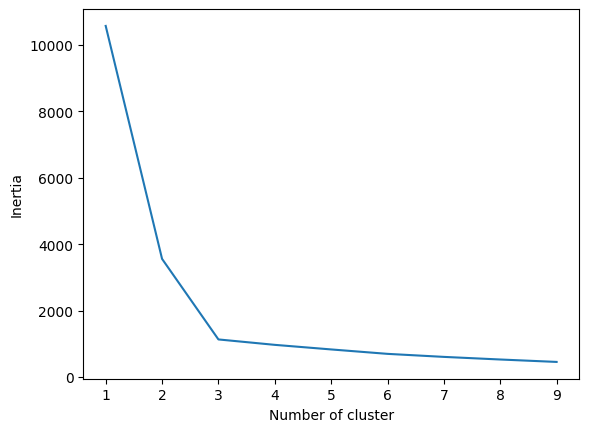

In [ ]:
intertia = []  #The optimal number of clusters is generally at the "elbow" point , where k starts to decrease more slowly, forming an "elbow" shape in a plot.
for i in range(1, 10, 1):
    km = KMeans(n_clusters= i)
    km.fit(x)
    intertia.append(km.inertia_)
plt.plot(range(1, 10, 1), intertia)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

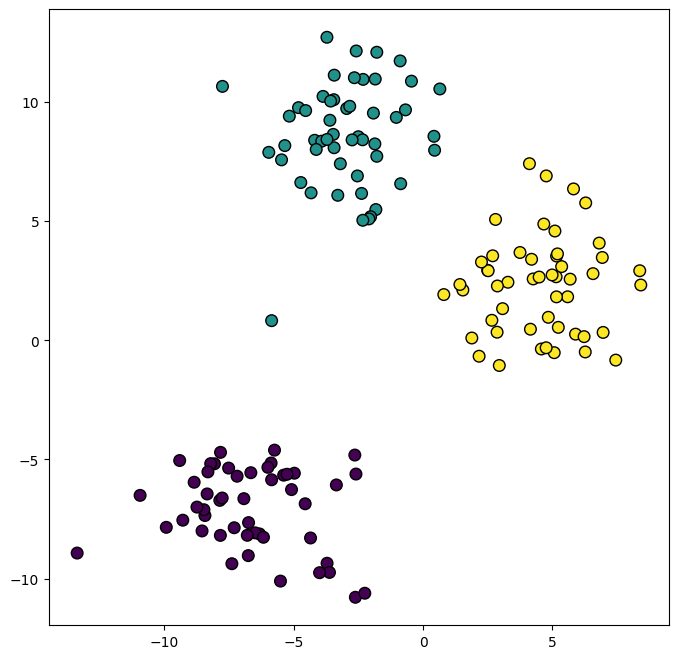

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(x)
lables = agg.labels_
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = lables, s = 70 , edgecolors= 'black')
plt.show()

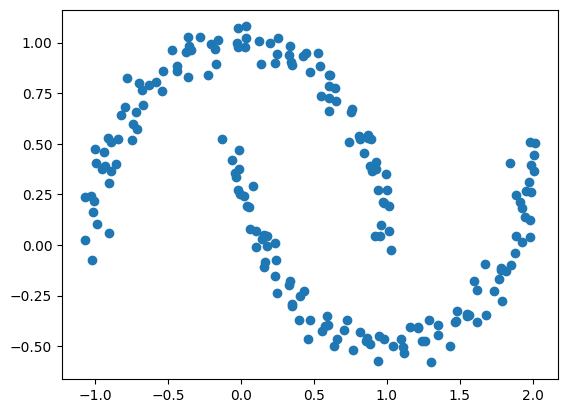

In [ ]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples= 200,
                  noise= .05,
                  random_state= 0)
plt.scatter(x[:,0],x[:,1])
plt.show()

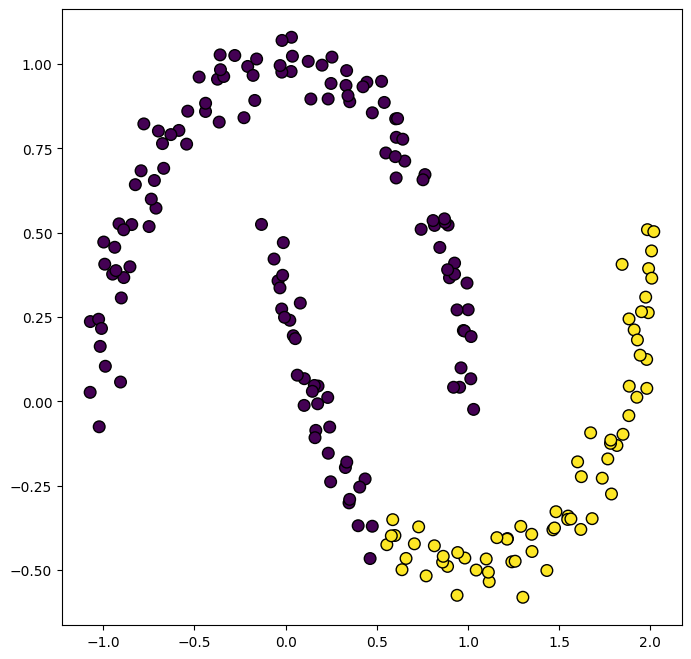

In [ ]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(x)
lables = agg.labels_
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = lables, s = 70 , edgecolors= 'black')
plt.show()

S: 0.49215648268306905


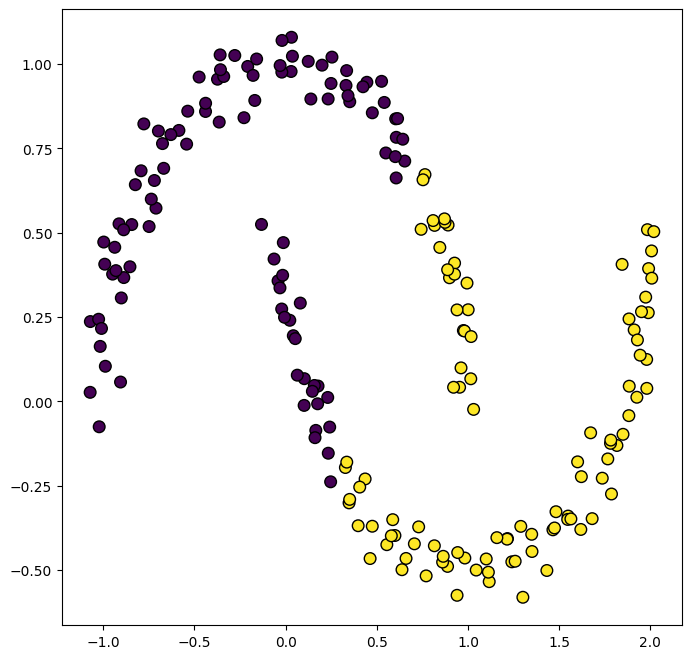

In [ ]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=2)
km.fit(x)
lables = km.labels_
print('S:',silhouette_score(x,lables))
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = lables, s = 70 , edgecolors= 'black')
plt.show()

S: 0.46003497164124546


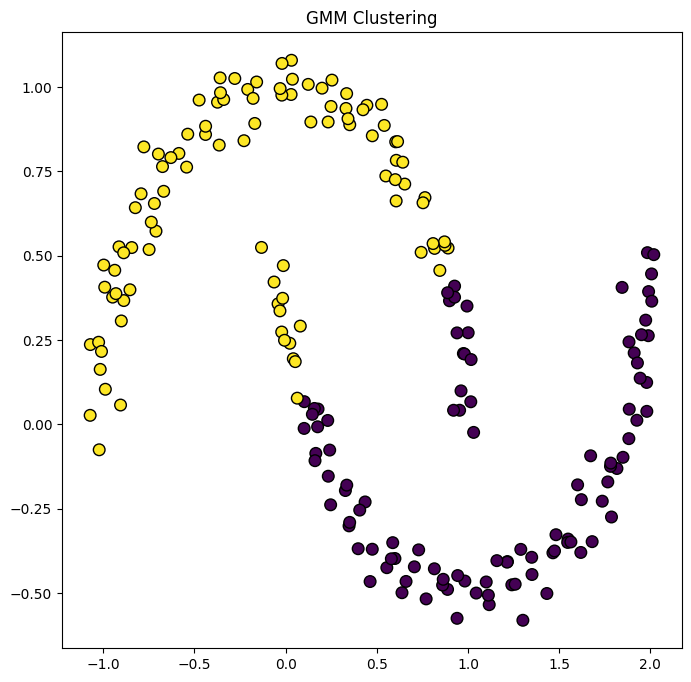

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=2, random_state=1)  # Adjust the number of components as needed
gmm.fit(x)
labels = gmm.predict(x)

print('S:', silhouette_score(x, labels))

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=labels, s=70, edgecolors='black')
plt.title('GMM Clustering')
plt.show()


S: 0.3310424053797827


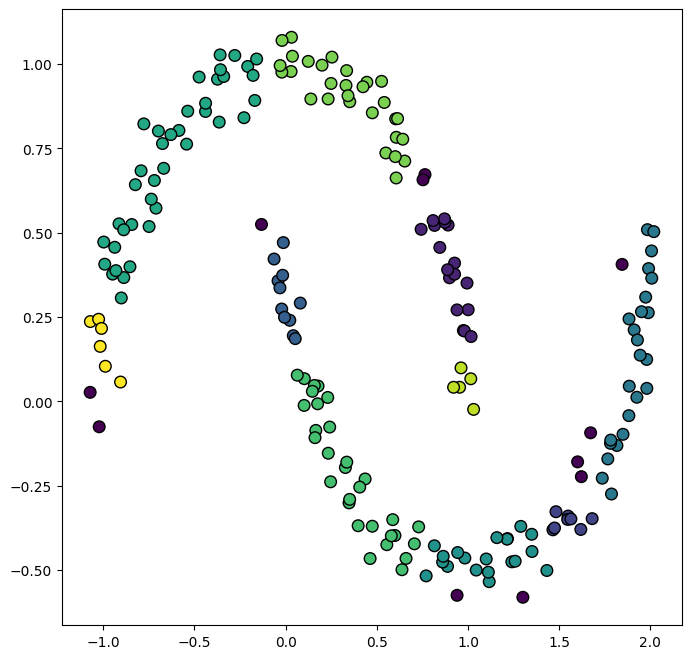

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=0.1, min_samples=3).fit(x)
lables = db.labels_
print('S:',silhouette_score(x,lables))
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = lables, s = 70 , edgecolors= 'black')
plt.show()

S: 0.3310424053797827


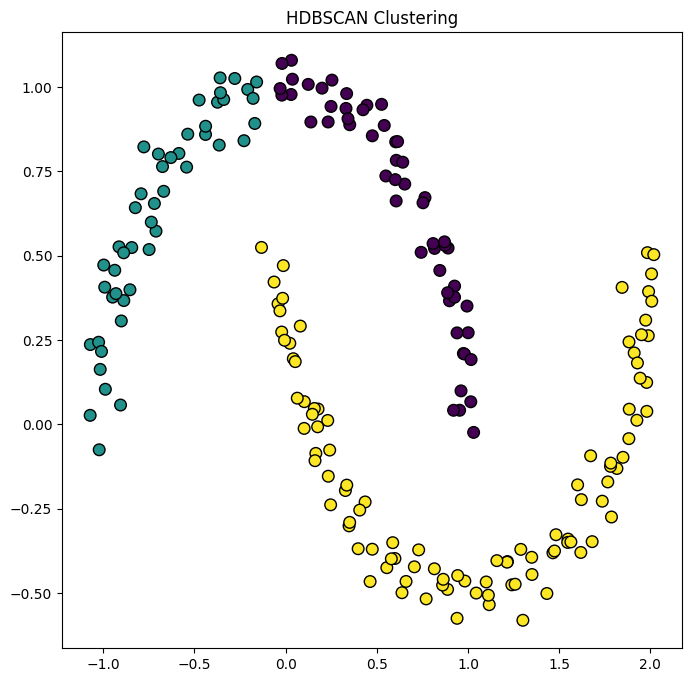

In [ ]:
!pip install -q hdbscan
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.metrics import silhouette_score

# Perform HDBSCAN clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=3)
labels = hdb.fit_predict(x)
print('S:',silhouette_score(x,lables))

# Plotting the clustered data
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=labels, s=70, edgecolors='black')
plt.title('HDBSCAN Clustering')
plt.show()

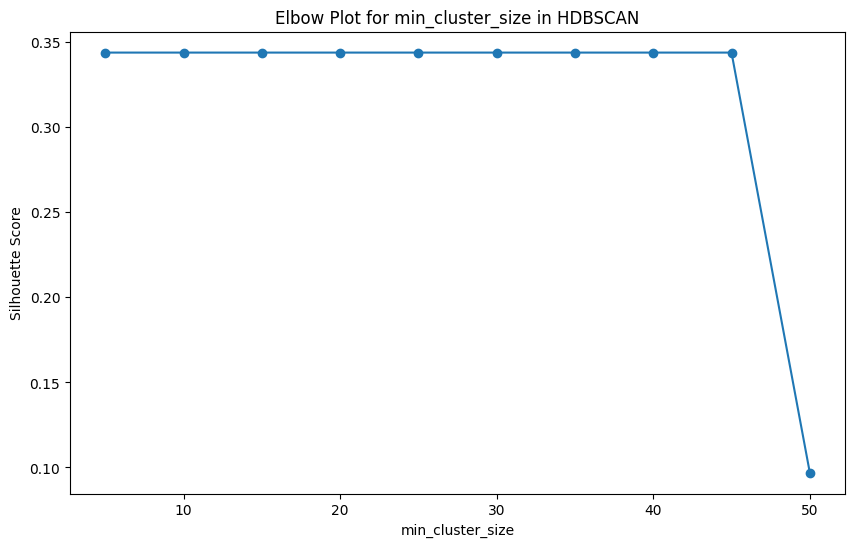

Optimal min_cluster_size: 5
Silhouette Score with optimal min_cluster_size: 0.3436266102657302


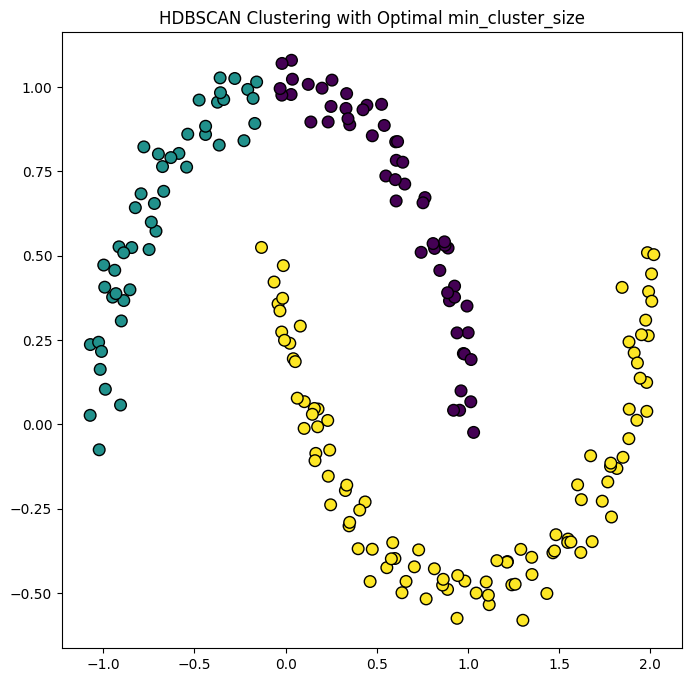

In [ ]:
!pip install -q hdbscan
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.metrics import silhouette_score

min_cluster_sizes = range(5, 51, 5)
silhouette_scores = []

for min_cluster_size in min_cluster_sizes:
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=3)
    labels = hdb.fit_predict(x)
    score = silhouette_score(x, labels) if len(set(labels)) > 1 else -1
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(min_cluster_sizes, silhouette_scores, marker='o')
plt.xlabel('min_cluster_size')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for min_cluster_size in HDBSCAN')
plt.show()

optimal_min_cluster_size = min_cluster_sizes[np.argmax(silhouette_scores)]
print('Optimal min_cluster_size:', optimal_min_cluster_size)

hdb_optimal = hdbscan.HDBSCAN(min_cluster_size=optimal_min_cluster_size, min_samples=3)
labels_optimal = hdb_optimal.fit_predict(x)
print('Silhouette Score with optimal min_cluster_size:', silhouette_score(x, labels_optimal))

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=labels_optimal, s=70, edgecolors='black')
plt.title('HDBSCAN Clustering with Optimal min_cluster_size')
plt.show()


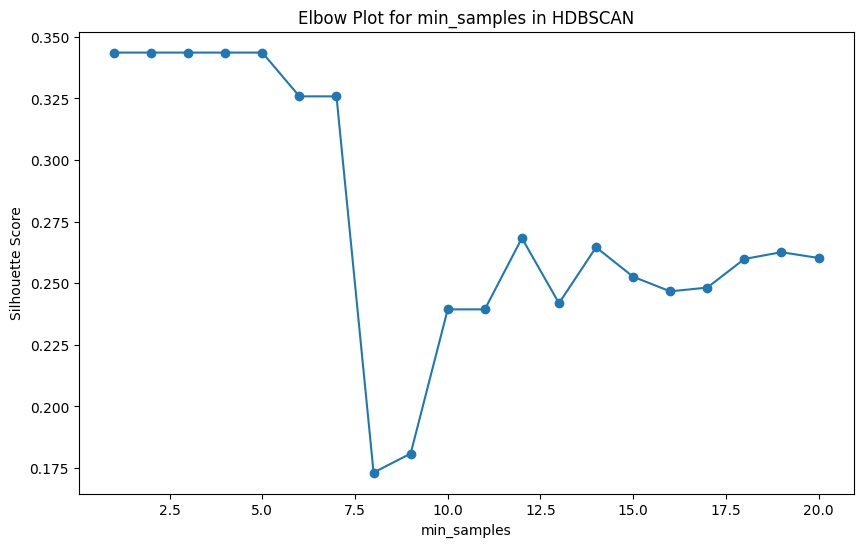

Optimal min_samples: 1
Silhouette Score with optimal min_samples: 0.3436266102657302


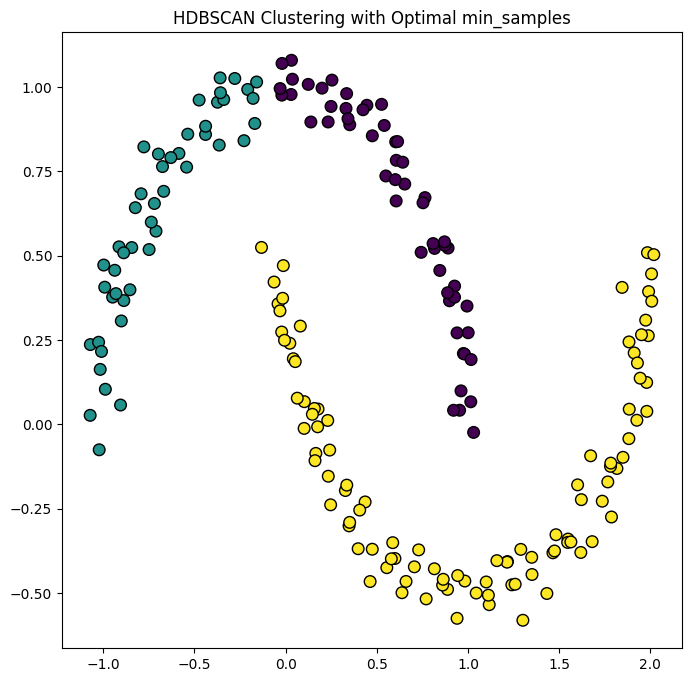

In [ ]:
!pip install -q hdbscan
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.metrics import silhouette_score

min_samples_values = range(1, 21)  # Test different values for min_samples
silhouette_scores = []

min_cluster_size = 5  # Fixed min_cluster_size; adjust based on your data

for min_samples in min_samples_values:
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = hdb.fit_predict(x)
    score = silhouette_score(x, labels) if len(set(labels)) > 1 else -1
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for min_samples in HDBSCAN')
plt.show()

optimal_min_samples = min_samples_values[np.argmax(silhouette_scores)]
print('Optimal min_samples:', optimal_min_samples)

hdb_optimal = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=optimal_min_samples)
labels_optimal = hdb_optimal.fit_predict(x)
print('Silhouette Score with optimal min_samples:', silhouette_score(x, labels_optimal))

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=labels_optimal, s=70, edgecolors='black')
plt.title('HDBSCAN Clustering with Optimal min_samples')
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv(f'{data_path}/mnist_train.csv', header = None)
df.head()

<ipython-input-6-1f30dd8b5ede>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

0    1    2    3    4    5    6    7    8    9    ...    775    776  \
0  label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20   
1      5    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      4    0    0    0    0    0    0    0    0    0  ...      0      0   
4      1    0    0    0    0    0    0    0    0    0  ...      0      0   

     777    778    779    780    781    782    783    784  
0  28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [ ]:
df.shape

(60001, 785)

In [ ]:
y = df.iloc[:,0].values
x = df.iloc[:,1:].values

<ipython-input-11-1983bf88dea1>:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

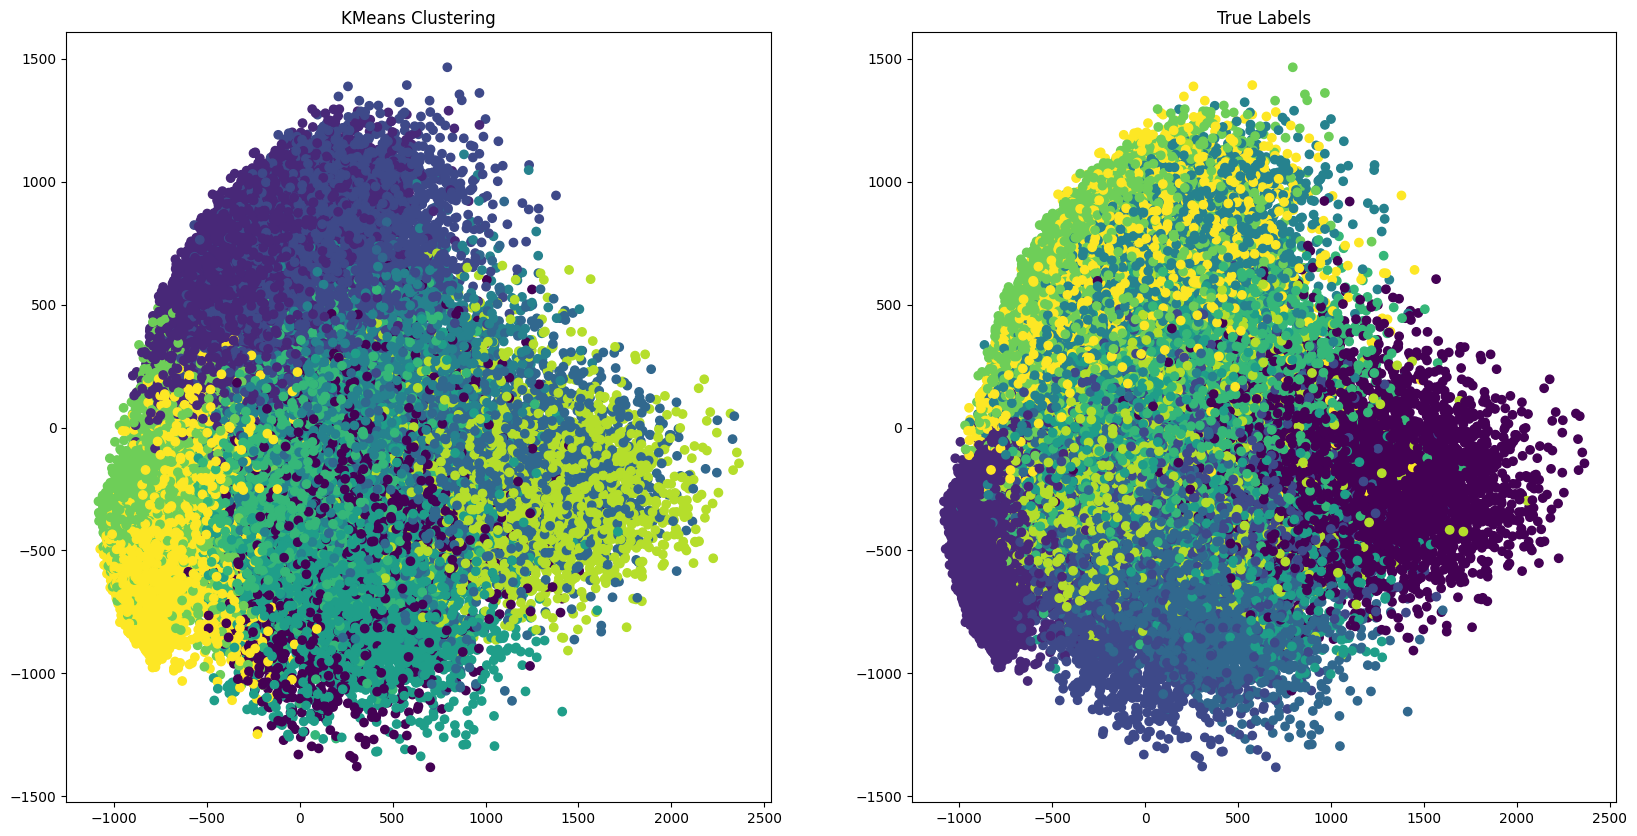

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv(f'{data_path}/mnist_train.csv', header=None)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

km = KMeans(n_clusters=10, random_state=1)
km.fit(x)
labels = km.labels_

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.title('KMeans Clustering')

plt.subplot(122)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.title('True Labels')
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# import hdbscan
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Load and preprocess data
# df = pd.read_csv(f'{data_path}/mnist_train.csv', header=None)
# df = df.apply(pd.to_numeric, errors='coerce')
# df = df.dropna()
# y = df.iloc[:, 0].values
# x = df.iloc[:, 1:].values

# # Grid search for optimal min_samples and min_cluster_size
# min_samples_range = range(5, 21, 5)
# min_cluster_size_range = range(10, 51, 10)
# best_score = -1
# best_params = (None, None)

# for min_samples in min_samples_range:
#     for min_cluster_size in min_cluster_size_range:
#         hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
#         labels = hdb.fit_predict(x)
#         if len(set(labels)) > 1:  # Ensure there is more than one cluster
#             score = silhouette_score(x, labels)
#             if score > best_score:
#                 best_score = score
#                 best_params = (min_samples, min_cluster_size)

# print(f'Best min_samples: {best_params[0]}')
# print(f'Best min_cluster_size: {best_params[1]}')
# print(f'Best silhouette score: {best_score}')

# # Apply HDBSCAN with the best parameters
# optimal_min_samples, optimal_min_cluster_size = best_params
# hdb_optimal = hdbscan.HDBSCAN(min_cluster_size=optimal_min_cluster_size, min_samples=optimal_min_samples)
# labels_optimal = hdb_optimal.fit_predict(x)

# # Perform PCA
# pca = PCA(n_components=2)
# x_pca = pca.fit_transform(x)

# # Plot the results
# plt.figure(figsize=(20, 10))
# plt.subplot(121)
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_optimal, cmap='tab10', edgecolors='black')
# plt.title(f'HDBSCAN Clustering (min_samples={optimal_min_samples}, min_cluster_size={optimal_min_cluster_size})')

# plt.subplot(122)
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='tab10', edgecolors='black')
# plt.title('True Labels')
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


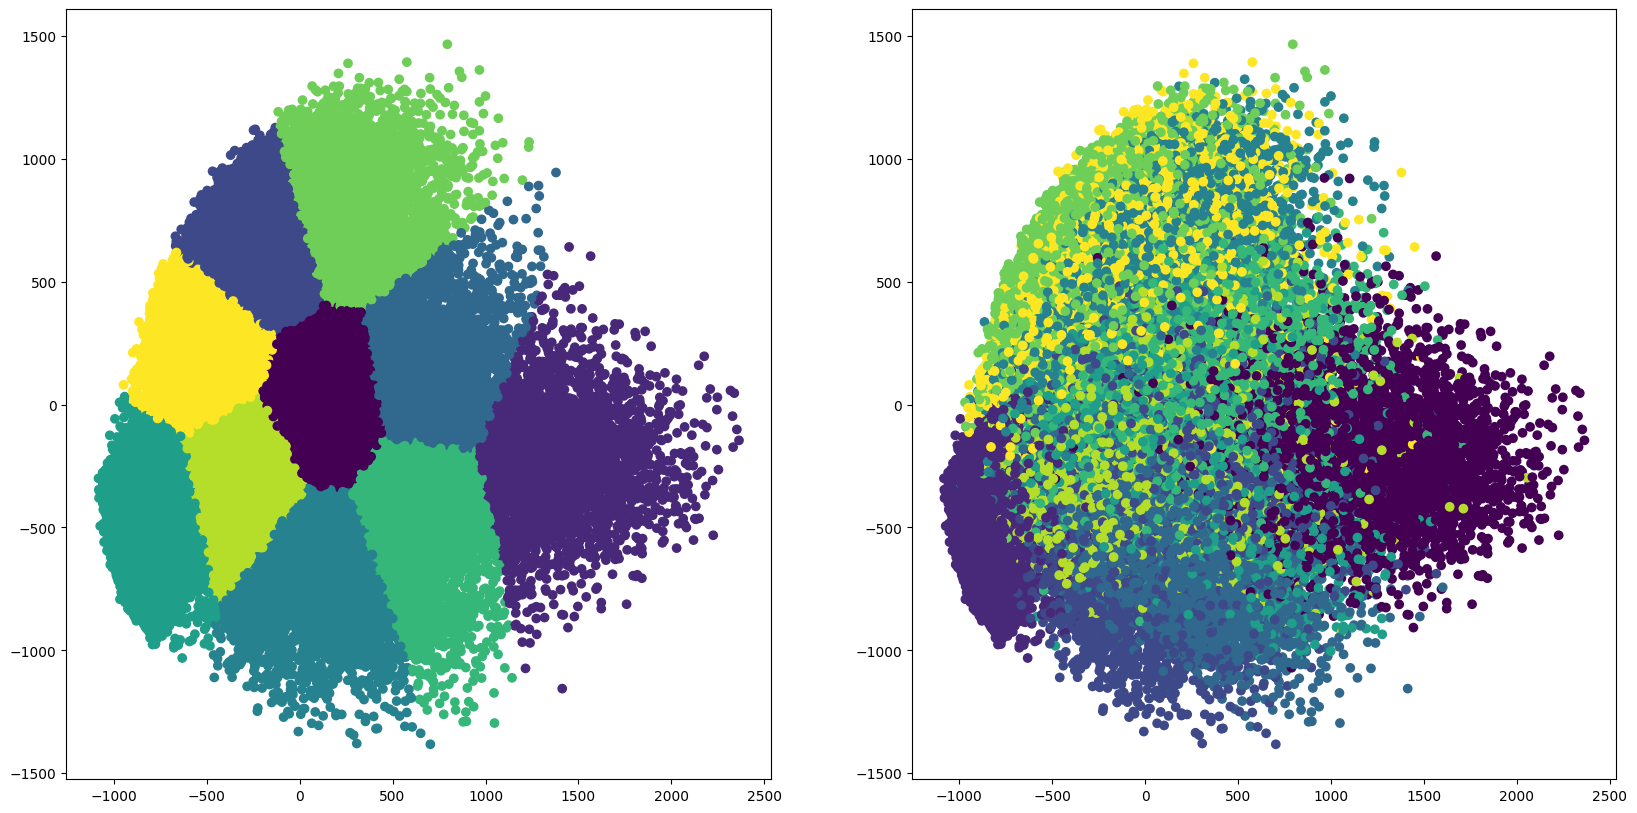

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(x)
km = KMeans(10)
km.fit(x_pca)
lables = km.labels_

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x_pca[:,0],x_pca[:,1],c = lables)
plt.subplot(122)
plt.scatter(x_pca[:,0],x_pca[:,1],c = y)
plt.show()

<ipython-input-13-d2aeacb58eb9>:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

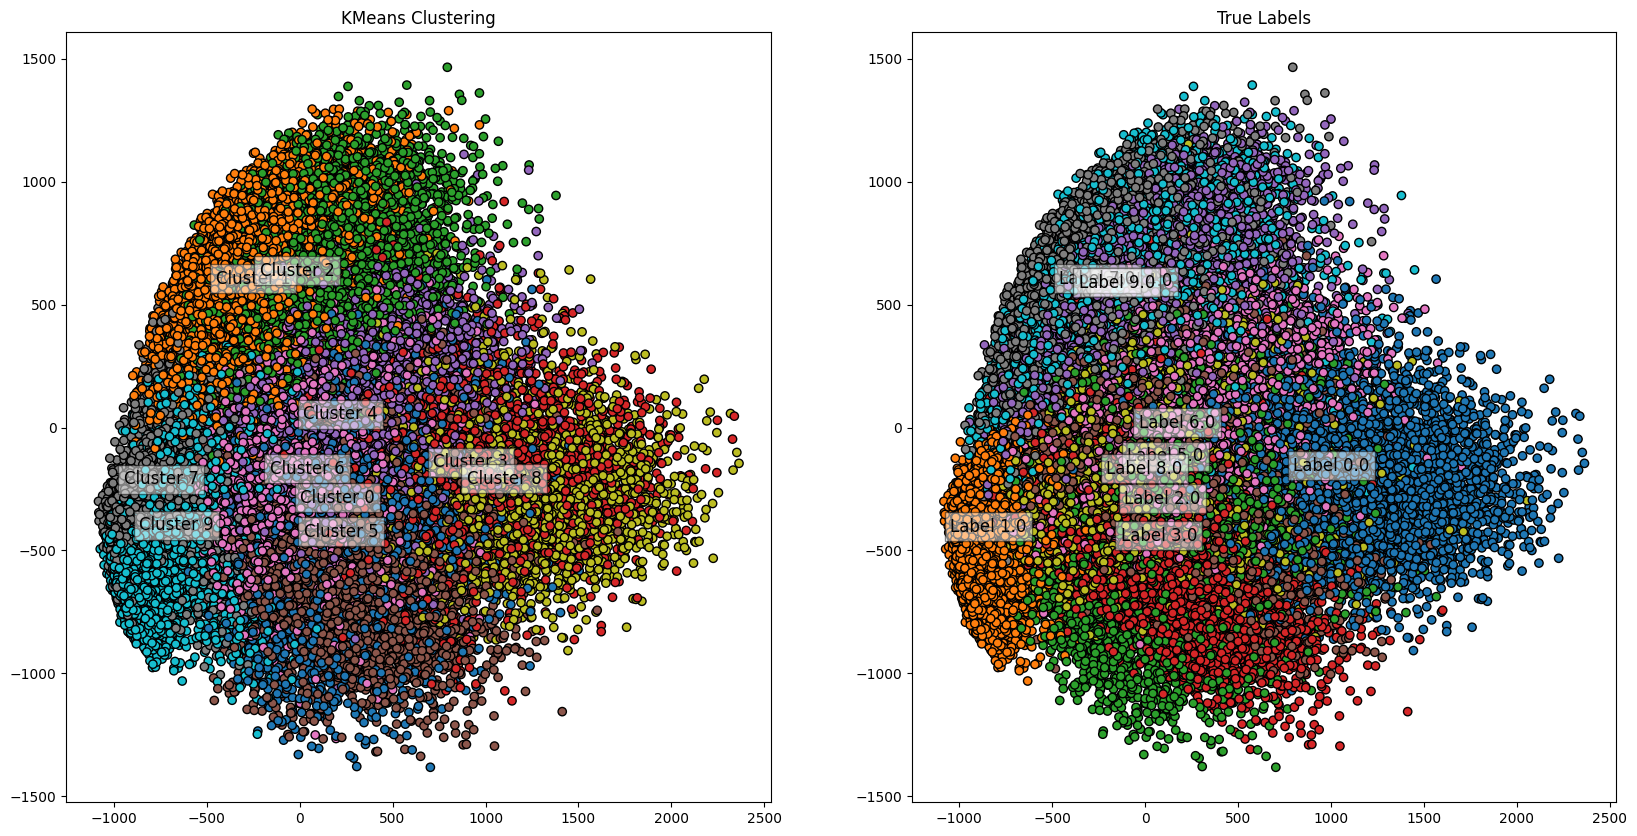

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv(f'{data_path}/mnist_train.csv', header=None)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

km = KMeans(n_clusters=10, random_state=1)
km.fit(x)
labels = km.labels_

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Create a color map
colors = plt.get_cmap('tab10')

plt.figure(figsize=(20, 10))

# Plot KMeans Clustering
plt.subplot(121)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap=colors, edgecolors='black')
plt.title('KMeans Clustering')

# Annotate clusters
for i in range(10):
    cluster_points = x_pca[labels == i]
    if cluster_points.shape[0] > 0:
        center = cluster_points.mean(axis=0)
        plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.5))

# Plot True Labels
plt.subplot(122)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=colors, edgecolors='black')
plt.title('True Labels')

# Annotate labels (optional and depending on the number of unique labels)
for i in np.unique(y):
    label_points = x_pca[y == i]
    if label_points.shape[0] > 0:
        center = label_points.mean(axis=0)
        plt.text(center[0], center[1], f'Label {i}', fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [ ]:
df = pd.read_csv(f'{data_path}/mnist_train.csv')

In [ ]:
df.shape

(60000, 785)

In [ ]:
df

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
59995      0      0      0      0      0      0      0      0  
59996      0      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0      0  
59998      0      0      0      0      0      0      0      0  
59999      0      0      0      0      0      0      0      0  

[60000 rows x 785 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load and preprocess the dataset
df = pd.read_csv(f'{data_path}/mnist_train.csv')

# Convert all columns to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Separate features and target
y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

# Perform KMeans clustering
km = KMeans(n_clusters=10, random_state=1, n_init=10)  # Explicitly set n_init
km.fit(x)
labels = km.labels_

# Compute the number of each target label for each cluster
cluster_label_counts = {}

for cluster in np.unique(labels):
    mask = labels == cluster
    true_labels_in_cluster = y[mask]

    # Count occurrences of each label in the cluster
    label_counts = np.bincount(true_labels_in_cluster.astype(int))

    # Store counts in the dictionary
    cluster_label_counts[cluster] = label_counts

# Print out the counts
for cluster, counts in cluster_label_counts.items():
    print(f"Cluster {cluster}:")
    for label, count in enumerate(counts):
        if count > 0:
            print(f"  Label {label}: {count}")



Cluster 0:
  Label 0: 17
  Label 1: 9
  Label 2: 4191
  Label 3: 216
  Label 4: 37
  Label 5: 15
  Label 6: 87
  Label 7: 39
  Label 8: 54
  Label 9: 13
Cluster 1:
  Label 0: 14
  Label 1: 9
  Label 2: 70
  Label 3: 50
  Label 4: 1943
  Label 5: 360
  Label 6: 1
  Label 7: 3773
  Label 8: 180
  Label 9: 2460
Cluster 2:
  Label 0: 38
  Label 1: 6
  Label 2: 174
  Label 3: 175
  Label 4: 3189
  Label 5: 378
  Label 6: 82
  Label 7: 1796
  Label 8: 193
  Label 9: 2902
Cluster 3:
  Label 0: 2498
  Label 2: 100
  Label 3: 127
  Label 4: 12
  Label 5: 277
  Label 6: 122
  Label 7: 14
  Label 8: 32
  Label 9: 19
Cluster 4:
  Label 0: 181
  Label 1: 8
  Label 2: 211
  Label 3: 57
  Label 4: 162
  Label 5: 121
  Label 6: 4913
  Label 7: 4
  Label 8: 47
  Label 9: 8
Cluster 5:
  Label 0: 162
  Label 1: 5
  Label 2: 326
  Label 3: 3926
  Label 4: 1
  Label 5: 1779
  Label 6: 29
  Label 7: 5
  Label 8: 1133
  Label 9: 85
Cluster 6:
  Label 0: 177
  Label 1: 10
  Label 2: 158
  Label 3: 1033
  Labe

In [ ]:
# Determine the maximum label in each cluster
cluster_max_labels = {}

for cluster, counts in cluster_label_counts.items():
    max_label = np.argmax(counts)
    max_count = counts[max_label]
    cluster_max_labels[cluster] = (max_label, max_count)

# Print out the maximum label and its count for each cluster
for cluster, (label, count) in cluster_max_labels.items():
    print(f"Cluster {cluster}:")
    print(f"  Maximum Label: {label}")
    print(f"  Count: {count}")

Cluster 0:
  Maximum Label: 2
  Count: 4191
Cluster 1:
  Maximum Label: 7
  Count: 3773
Cluster 2:
  Maximum Label: 4
  Count: 3189
Cluster 3:
  Maximum Label: 0
  Count: 2498
Cluster 4:
  Maximum Label: 6
  Count: 4913
Cluster 5:
  Maximum Label: 3
  Count: 3926
Cluster 6:
  Maximum Label: 8
  Count: 3459
Cluster 7:
  Maximum Label: 1
  Count: 3717
Cluster 8:
  Maximum Label: 0
  Count: 2812
Cluster 9:
  Maximum Label: 1
  Count: 2978


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Load and preprocess the dataset
df = pd.read_csv(f'{data_path}/mnist_train.csv')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Separate features and target
y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Perform KMeans clustering on the training set
km = KMeans(n_clusters=10, random_state=1, n_init=10)  # Explicitly set n_init
km.fit(x_train)
train_labels = km.labels_

# Predict clusters for the test set
test_labels = km.predict(x_test)

test_silhouette_score = silhouette_score(x_test, test_labels)

print(f'Silhouette Score for Test Set: {test_silhouette_score:.4f}')


Silhouette Score for Test Set: 0.0591


In [ ]:
cluster_to_label = {
    0: 2,
    1: 7,
    2: 4,
    3: 0,
    4: 6,
    5: 3,
    6: 8,
    7: 1,
    8: 0,
    9: 5
}

In [ ]:
# Map clusters to labels
test_target = np.array([cluster_to_label[cluster] for cluster in test_labels])

# Calculate accuracy
accuracy = accuracy_score(y_test, test_target)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.0940
